In [1]:
import pandas as pd
df = pd.read_csv ('train_u6lujuX_CVtuZ9i.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.dropna(axis = 0 , inplace = True)

In [6]:
df.round(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


In [14]:
from sklearn.cluster import KMeans

k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['ApplicantIncome','LoanAmount']])
    sse.append(km.inertia_)

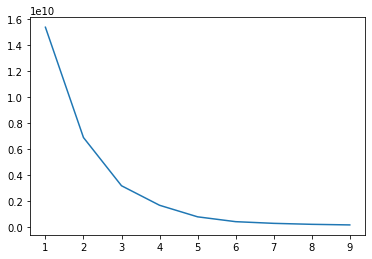

In [16]:
from matplotlib import pyplot as plt
plt.plot(k_rng, sse)

In [19]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = df[['ApplicantIncome','LoanAmount']]
scale.fit(X)
X_scaled = scale.transform(X)
X_scaled

array([[-1.37969591e-01, -2.08089165e-01],
       [-4.17535804e-01, -9.79000849e-01],
       [-4.91180221e-01, -3.07561640e-01],
       [ 1.12280140e-01, -4.64463928e-02],
       [ 9.31924171e-03,  1.52024509e+00],
       [-5.35331549e-01, -6.18413126e-01],
       [-4.11178013e-01,  1.64932617e-01],
       [-2.39870858e-01,  2.89273211e-01],
       [ 1.32043710e+00,  2.53983797e+00],
       [-3.82214741e-01, -9.29264611e-01],
       [-4.04643616e-01,  6.87163113e-01],
       [-6.20102101e-01, -3.82165997e-01],
       [-7.17941445e-01, -1.58826976e+00],
       [-7.31554404e-02, -2.45391343e-01],
       [-3.27467094e-01, -8.54660255e-01],
       [-8.42815752e-02, -1.45918868e-01],
       [ 4.05444963e-01, -5.06506591e-01],
       [ 1.04332901e-01,  2.11707995e+00],
       [-4.88177930e-01, -3.57297878e-01],
       [ 7.40995061e-01,  5.75256578e-01],
       [-4.53033473e-01, -2.82693522e-01],
       [-2.01017688e-01, -4.31902235e-01],
       [-6.92686885e-01, -1.36445669e+00],
       [-3.

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
y_pred

array([1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,

In [25]:
kmeans.cluster_centers_

array([[ 0.7862496 ,  1.57773243],
       [-0.24302979, -0.32924314],
       [ 7.23692708,  1.91067456]])

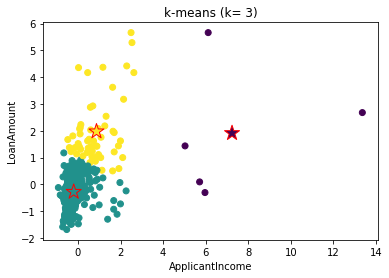

In [28]:
plt.scatter(X_scaled[:,0],X_scaled[:,1], c = y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker = '*',s = 250, c = [0,1,2], edgecolors = 'r')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('k-means (k= 3)')
plt.show()

# This is the second part: testing of the model.

In [43]:
df1 = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
df1.dropna(axis = 0 , inplace = True)
df1 
X1 = df1[['ApplicantIncome','LoanAmount']]

In [44]:
scale = StandardScaler()
scale.fit(X1)
X1_scaled = scale.transform(X1)
X1_scaled

array([[ 2.26382087e-01, -4.49565323e-01],
       [-3.26479746e-01, -1.81091856e-01],
       [ 7.58296965e-02,  1.19483466e+00],
       [-2.84659638e-01, -9.86512256e-01],
       [-5.16970340e-01,  2.55177527e-01],
       [-5.04215207e-01, -1.30532450e+00],
       [-1.58153810e-01,  1.71279569e-01],
       [-4.67831712e-01, -2.31430631e-01],
       [-3.23343238e-01, -7.85157156e-01],
       [ 5.99011552e-03, -2.14651039e-01],
       [ 2.15299758e-01, -9.71938977e-02],
       [-1.13652295e-02,  1.06059793e+00],
       [-1.78018361e-01, -1.81091856e-01],
       [ 9.59488587e-01,  2.73855709e+00],
       [-6.97842309e-01, -6.17361239e-01],
       [-5.74891190e-01, -1.48990001e+00],
       [-5.34116584e-01, -1.82549184e+00],
       [-1.82409473e-01, -1.97871448e-01],
       [ 1.59469913e-01,  2.57076118e+00],
       [-9.69673013e-01,  1.88059160e-01],
       [ 5.98581051e-01,  2.31906730e+00],
       [-3.54499219e-01, -1.97871448e-01],
       [-4.51521870e-01, -1.03685103e+00],
       [ 3.

In [45]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X1_scaled)
y_pred1 = kmeans.predict(X1_scaled)
y_pred1

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0])

In [46]:
kmeans.cluster_centers_

array([[-0.18538373, -0.32465832],
       [14.19618019,  3.74533259],
       [ 0.64853828,  1.58504942]])

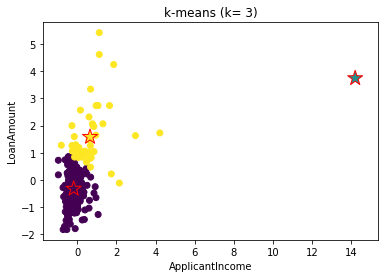

In [47]:
plt.scatter(X1_scaled[:,0],X1_scaled[:,1], c = y_pred1)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker = '*',s = 250, c = [0,1,2], edgecolors = 'r')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('k-means (k= 3)')
plt.show()

In [52]:
df1['clusters'] = y_pred1
df1.round(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,clusters
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,2
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban,0
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,0
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,0
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0
